# Clubes de Ciencia México 2021
## 13,800 millones de años de viaje, la historia de nuestro universo

*Instructores:* 

Jose María Ezquiaga (University of Chicago, ezquiaga@uchicago.edu)

Miriam Gudino (UNAM, miriamegy@gmail.com)

Gabriel Missael Barco (TA, Universidad de Guanajuato, missaelgabo@gmail.com)

---

## Actividad 3: Los primeros instantes del Universo

En la tercera clase del club de ciencia hemos aprendido sobre fondo cósmico de microondas y los primeros minutos del universo. En esta actividad vamos a explorar como cada componente evoluciona en función del tiempo y cuando se produce la transición entre cada fase.

<img src='https://apod.nasa.gov/apod/image/1807/CMB2018_Planck_4672.jpg' alt='Alt text' title='Title text' />

Utilizaremos los siguientes paquetes de python

In [1]:
#IMPORT
import numpy as np
import matplotlib.pyplot as plt

Para hacer los plots más bonitos

In [2]:
%config InlineBackend.figure_format = 'retina'
#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fontSz = 17
fontsz = 15
fontssz = 13

# Evolucíon de los componentes del universo

Como vimos en la actividad anterior, el factor de escala $a(t)$ determina el tamaño del universo. Su evolución viene dada por las [ecuaciones de Friedmann](https://en.wikipedia.org/wiki/Friedmann_equations). El parametro de Hubble $H(t)\equiv \dot{a}/a$ que determina la evolución del factor de escala:

\begin{equation}
H(z)=H_0\sqrt{\Omega_{DE}+\Omega_{DM}(1+z)^3 +\Omega_{R}(1+z)^4+\Omega_{\kappa}(1+z)^2}\,,
\end{equation}

donde $H_0$ es la constante de Hubble, $\Omega_{DE}$ la abundancia de energía oscura, $\Omega_{DM}$ la abundancia de materia oscura, $\Omega_{R}$ la abundancia de radiación y $\Omega_{\kappa}$ la curvatura. 
En esta ecuación hemos escrito la evolución temporal en función del redshift $z$. 

Por tanto, la evolución de cada componente está dada por
\begin{align}
&\rho_M=\rho_{M,0}/a^3=\rho_{M,0}(1+z)^3\,, \\
&\rho_R=\rho_{R,0}/a^4=\rho_{M,0}(1+z)^4\,, \\
&\rho_{DE}=\rho_{DE,0}\,.
\end{align}

La abundancia de los distintos componentes debe satisfacer

\begin{equation}
1 = \Omega_{DE} + \Omega_{DM} + \Omega_{R} + \Omega_\kappa\,.
\end{equation}

Las unidades del parametro de Hubble son de frecuencia (1/tiempo). Por razones prácticas a los cosmólogos les gusta utilizar km/s/Mpc (recordad que $1\mathrm{Mpc}=3\cdot10^{22}$m). 

Los parámetros cosmológicos más recientes los puedes encontrar en los resultados del satélite [Planck 2018, Tabla 2](https://arxiv.org/pdf/1807.06209v1.pdf)

In [3]:
def oM(oM0,z):
    return oM0 * (1. + z)**3
def oR(oR0,z):
    return oR0 * (1. + z)**4
def oDE(oDE0,z):
    return oDE0
def oT(oM0,oR0,oDE0,z):
    return oM(oM0,z) + oR(oR0,z) + oDE(oDE0,z)

Hacemos un plot de la evolución con el redshift

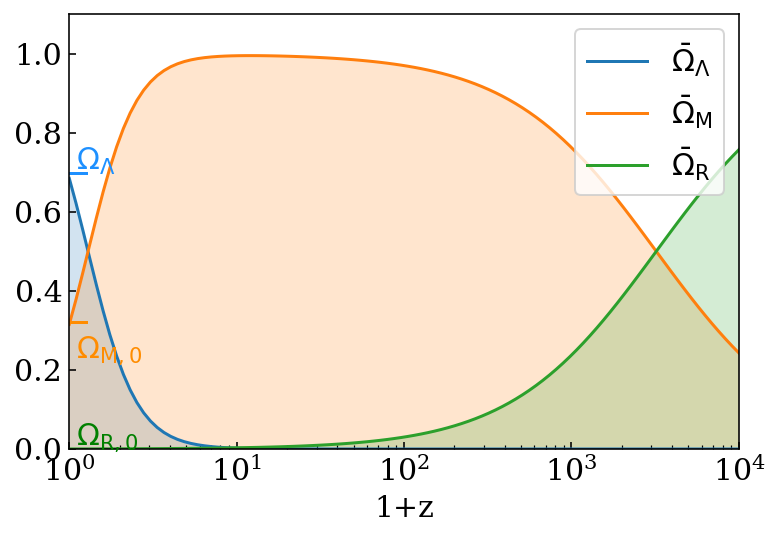

In [4]:
oM0 = 0.321
oR0 = 1.0e-4
oDE0 = 0.697
z = np.logspace(0,4,100)
plt.semilogx(z,oDE(oDE0,z-1.)/oT(oM0,oR0,oDE0,z-1.),label=r'$\bar{\Omega}_\Lambda$')
plt.fill_between(z,oDE(oDE0,z-1.)/oT(oM0,oR0,oDE0,z-1.),alpha=0.2)
plt.semilogx(z,oM(oM0,z-1.)/oT(oM0,oR0,oDE0,z-1.),label=r'$\bar{\Omega}_\mathrm{M}$')
plt.fill_between(z,oM(oM0,z-1.)/oT(oM0,oR0,oDE0,z-1.),alpha=0.2)
plt.semilogx(z,oR(oR0,z-1.)/oT(oM0,oR0,oDE0,z-1.),label=r'$\bar{\Omega}_\mathrm{R}$')
plt.fill_between(z,oR(oR0,z-1.)/oT(oM0,oR0,oDE0,z-1.),alpha=0.2)

plt.plot(np.logspace(0,0.1,10),oDE0*np.ones(10),color='dodgerblue')
plt.plot(np.logspace(0,0.1,10),oM0*np.ones(10),color='darkorange')
plt.plot(np.logspace(0,0.1,10),oR0*np.ones(10),color='green')
plt.text(1.1,oR0+0.01,r'$\Omega_{\mathrm{R},0}$',fontsize=fontsz,color='green')
plt.text(1.1,oM0-0.09,r'$\Omega_{\mathrm{M},0}$',fontsize=fontsz,color='darkorange')
plt.text(1.1,oDE0+0.01,r'$\Omega_{\Lambda}$',fontsize=fontsz,color='dodgerblue')
plt.xlabel('1+z',fontsize=fontsz)
plt.xlim([1,1e4])
plt.ylim([0,1.1])
plt.tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
plt.legend(fontsize=fontsz,loc='upper right')
#plt.savefig('cosmic_pie_zmax_%s.pdf' % (max(z)),bbox_inches ='tight')
plt.show()

También podemos obtener la abundancia para un redshift dado

In [5]:
zz = 0.
print 'z = ',zz,', oDE = ', oDE(oDE0,zz)/oT(oM0,oR0,oDE0,zz),', oDM = ', oM(oM0,zz)/oT(oM0,oR0,oDE0,zz),', oR = ', oR(oR0,zz)/oT(oM0,oR0,oDE0,zz)
zz = 2.
print 'z = ',zz,', oDE = ', oDE(oDE0,zz)/oT(oM0,oR0,oDE0,zz),', oDM = ', oM(oM0,zz)/oT(oM0,oR0,oDE0,zz),', oR = ', oR(oR0,zz)/oT(oM0,oR0,oDE0,zz)
zz = 1100.
print 'z = ',zz,', oDE = ', oDE(oDE0,zz)/oT(oM0,oR0,oDE0,zz),', oDM = ', oM(oM0,zz)/oT(oM0,oR0,oDE0,zz),', oR = ', oR(oR0,zz)/oT(oM0,oR0,oDE0,zz)

z =  0.0 , oDE =  0.684608584618 , oDM =  0.315293193203 , oR =  9.82221785679e-05
z =  2.0 , oDE =  0.0743696716851 , oDM =  0.924766060968 , oR =  0.000864267346699
z =  1100.0 , oDE =  1.21141458414e-09 , oDM =  0.744606818861 , oR =  0.255393179927


---

## 1. Calcular el redshift $z$ cuando se produce la transición entre la época dominada por radiación y la época dominada por materia

Definimos la transición coomo el momento en que $\rho_M=\rho_R$

## 2. Calcular el redshift $z$ cuando se produce la transición entre la época dominada por materia y la época dominada por energía oscura

Definimos la transición coomo el momento en que $\rho_M=\rho_{DE}$

## 3. Cuál era la temperatura del universo cuando el fondo cósmico de microondas fue emitido?

Recordad que $T = T_0(1+z)$. Si puede presenta los resultados en un gráfica.

---

## Cosmology in python? 

Use [astropy](https://docs.astropy.org/en/stable/cosmology/index.html)!!

---

*CMB tutorial* http://background.uchicago.edu/~whu/beginners/introduction.html